In [1]:
import lane_detection
import cv2
import matplotlib.pyplot as plt
import numpy as np

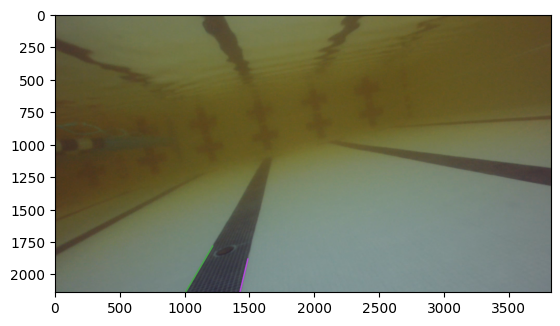

In [2]:
img = cv2.imread("lanes.png")

lines = lane_detection.detect_lines(img, 35, 60, 3, 200, 20)
lines = lane_detection.rmvExcessLines(lines)
img = lane_detection.draw_lines(img, lines, (0, 255, 0))
plt.imshow(img)

In [3]:
lanes = lane_detection.detect_lanes(lines)
print(lanes)

pass
[[array([[1006, 2136, 1214, 1782]], dtype=int32), array([[1423, 2137, 1484, 1882]], dtype=int32)]]


[array([[1006, 2136, 1214, 1782]], dtype=int32), array([[1423, 2137, 1484, 1882]], dtype=int32)]
(5, 13, 27)
(5, 13, 27)


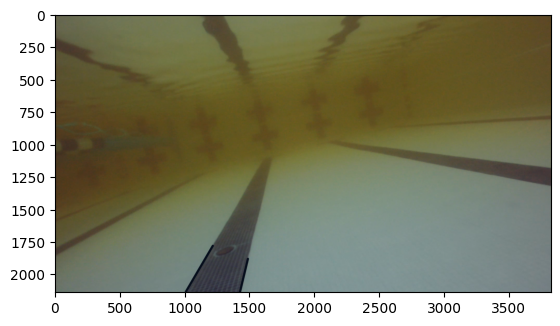

In [4]:
img = lane_detection.draw_lanes(img, lanes)
plt.imshow(img)

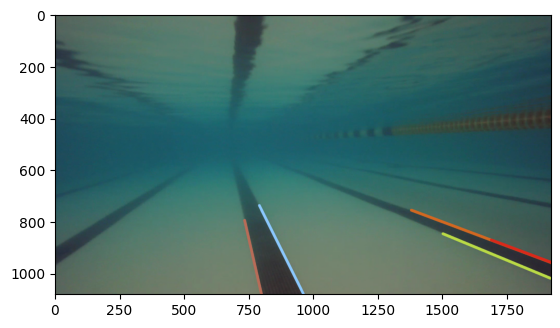

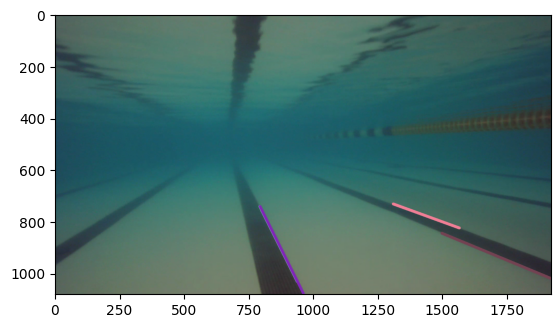

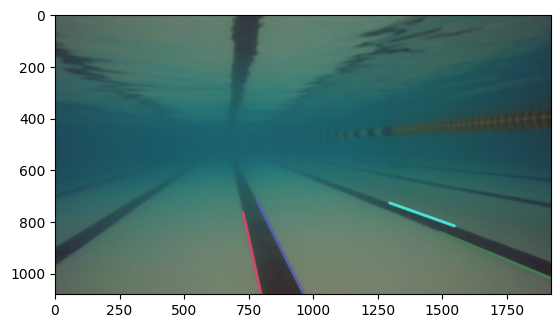

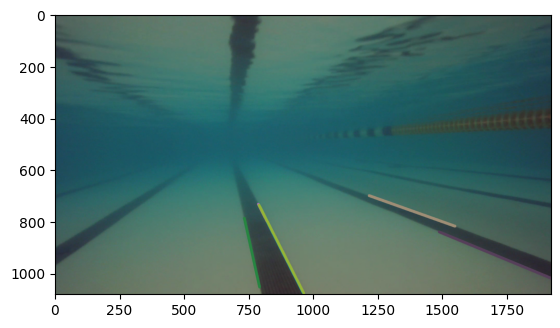

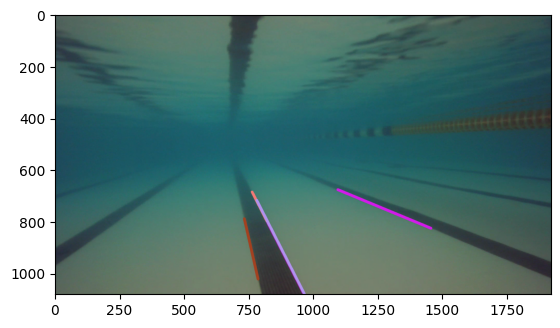

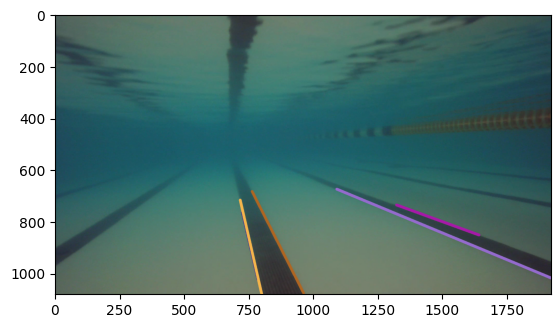

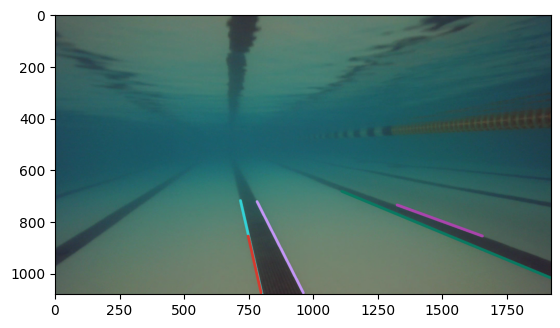

KeyboardInterrupt: 

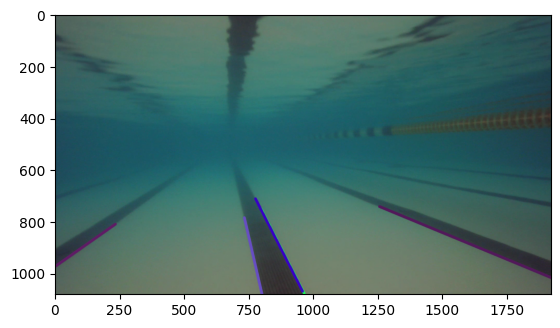

In [3]:
i = 0
cap = cv2.VideoCapture('AUV_Vid.mkv')

while True:
    ret, frame = cap.read()
    if i % 1 == 0:
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        lines = lane_detection.detect_lines(frame, 35, 60, 3, 200, 20)
        lines = lane_detection.rmvExcessLines(lines)
        img = lane_detection.draw_lines(frame, lines, (0, 255, 0))
        plt.imshow(img)
        plt.show(False)
    if i == 300:
        break
    i += 1